In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

util_perso = os.path.abspath('util/gev')
sys.path.append(util_perso)
util_perso = os.path.abspath('util/processing')
sys.path.append(util_perso)

import time_series
from data_processing import depickle

In [8]:
pca40_split_0 = depickle('analysis_loadings_selected/pca40_split_0.pkl')

output_type = ['cdf', 'max']

for out in output_type:
    loadings_selected = pd.read_csv(f'analysis_loadings_selected/loadings_selected_{out}.csv')
    loadings_selected[["var_name", "PC"]] = loadings_selected["selected_pc"].str.rsplit("_PC", n=1, expand=True)
    loadings_selected["PC"] = "PC" + loadings_selected["PC"]
    loadings_selected = loadings_selected.drop(columns=["selected_pc"])

    scores = {}  # dictionary to store dataframes
    loadings = {}  # dictionary to store dataframes

    # load the pca scores
    for var in loadings_selected['var_name']:
        if  var.startswith('10m_'):
            continue
        #if var.startswith('mean_sea_level_pressure_min'):
        #    continue
        scores[var] = pd.read_csv(f'data/PCA/PCA_scores_1000/{var}.csv').drop(columns=['variable'])
        loadings[var] = pd.read_csv(f'data/PCA/PCA_loadings_1000/{var}.csv').drop(columns=['variable'])

    locals()[f'loadings_selected_{out}'] = loadings_selected
    locals()[f'scores_{out}'] = scores
    locals()[f'loadings_{out}'] = loadings

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Shape of the scores

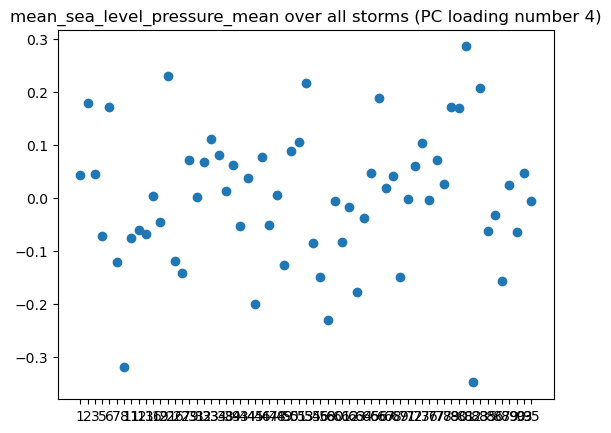

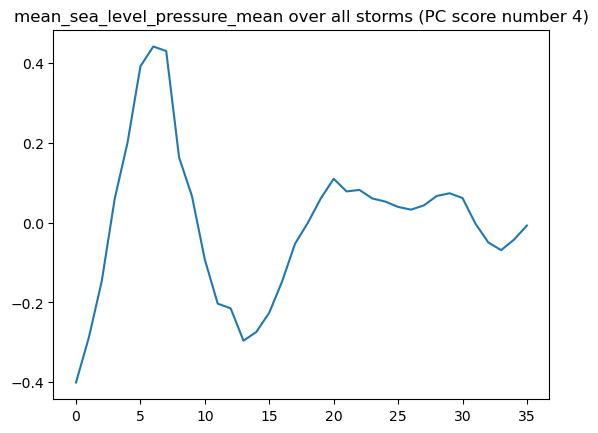

In [ ]:
mean_sea_level_pressure_mean_sc = scores['mean_sea_level_pressure_mean']
mean_sea_level_pressure_mean_lo = loadings['mean_sea_level_pressure_mean']
pc_n = int(loadings_selected[loadings_selected['var_name'] == 'mean_sea_level_pressure_mean']['PC'].values[0].split('PC')[1])

mean_sea_level_pressure_mean_pc = mean_sea_level_pressure_mean_lo.iloc[pc_n-1,:]
plt.scatter(mean_sea_level_pressure_mean_lo.columns, mean_sea_level_pressure_mean_pc)
plt.title('mean_sea_level_pressure_mean over all storms (PC loading number 4)')
plt.show()

mean_sea_level_pressure_mean_score_pc = mean_sea_level_pressure_mean_sc['PCA_4']
plt.plot(mean_sea_level_pressure_mean_score_pc)
plt.title('mean_sea_level_pressure_mean over all storms (PC score number 4)')
plt.show()

['PC3']


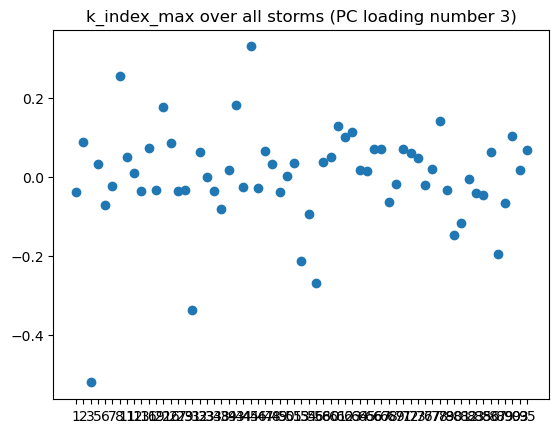

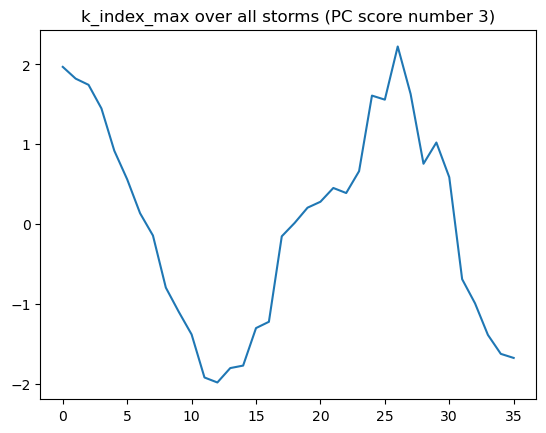

In [49]:
k_index_max_sc = scores['K_index_max']
k_index_max_lo = loadings['K_index_max']
print(loadings_selected[loadings_selected['var_name'] == 'K_index_max']['PC'].values)

k_index_max_pc = k_index_max_lo.iloc[3,:]
plt.scatter(k_index_max_lo.columns, k_index_max_pc)
plt.title('k_index_max over all storms (PC loading number 3)')
plt.show()

k_index_max_score_pc = k_index_max_sc['PCA_3']
plt.plot(k_index_max_score_pc)
plt.title('k_index_max over all storms (PC score number 3)')
plt.show()

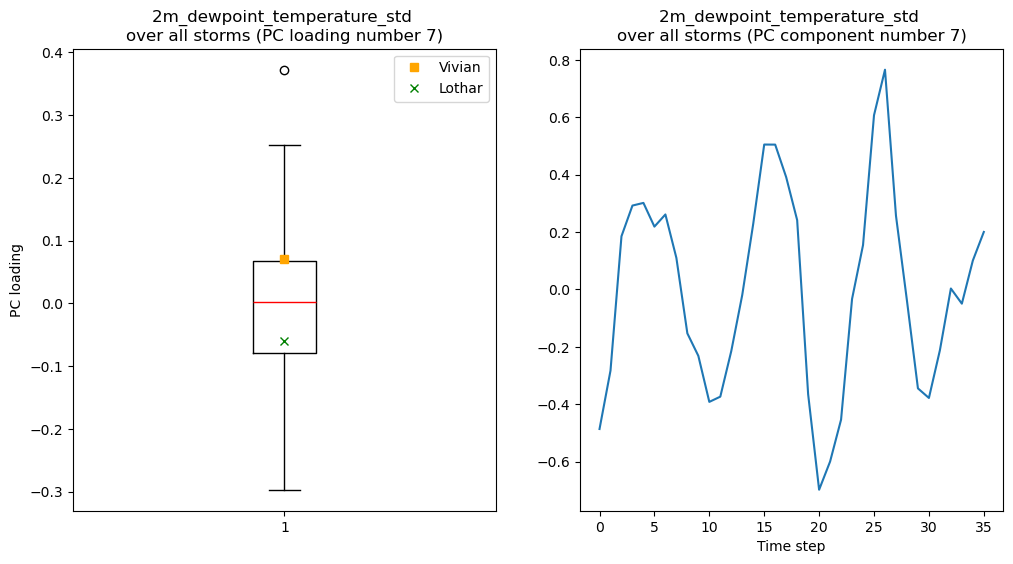

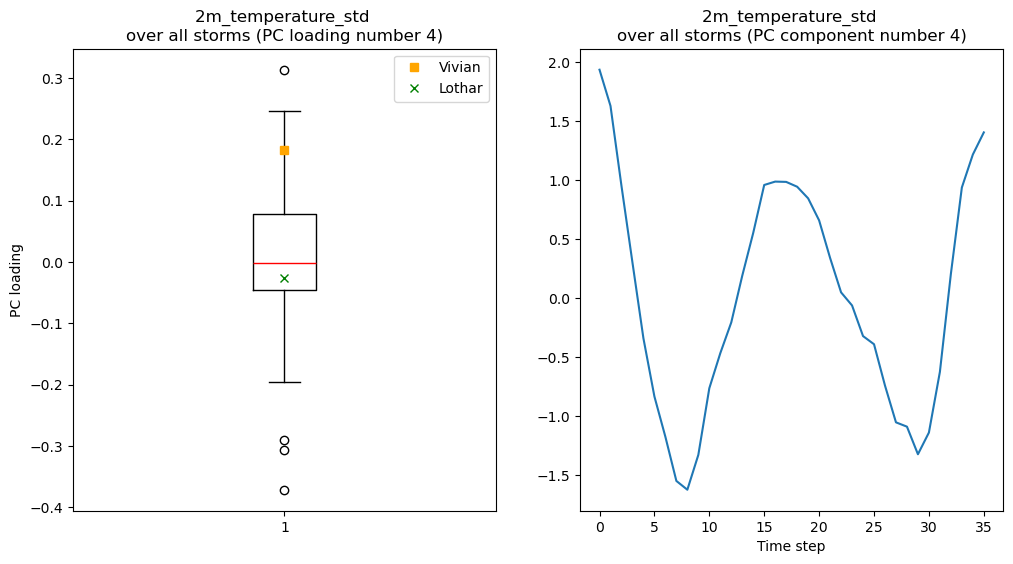

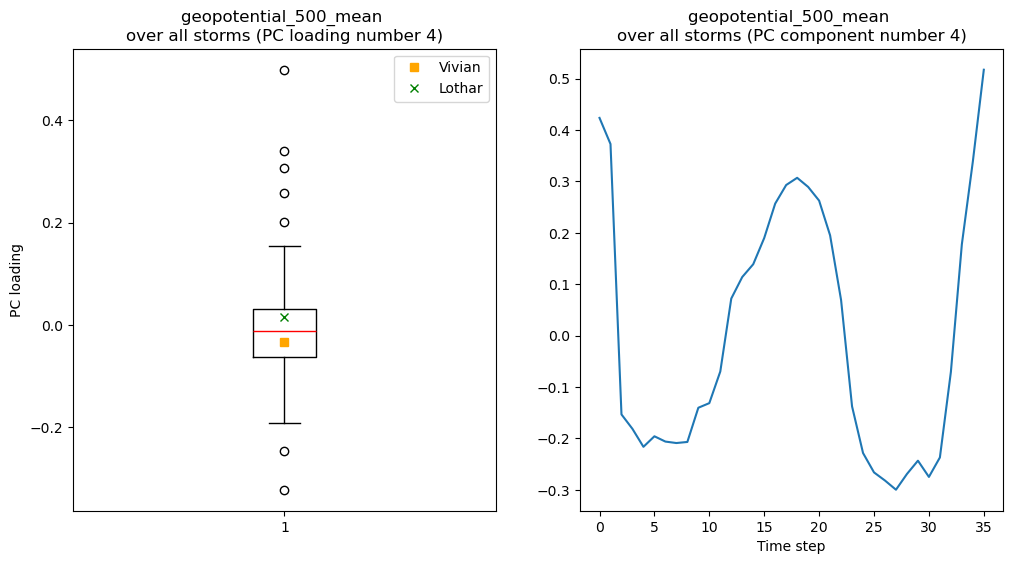

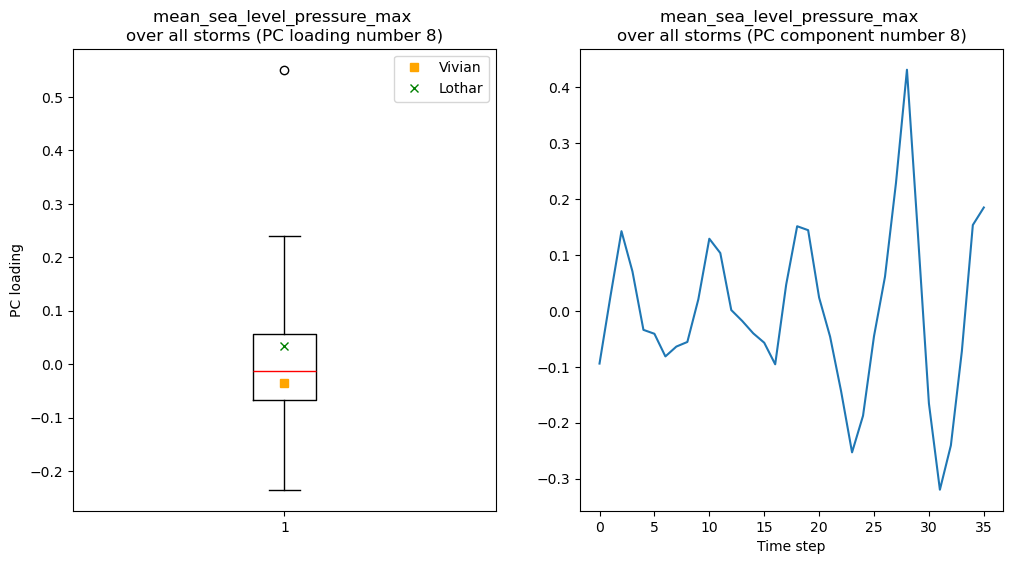

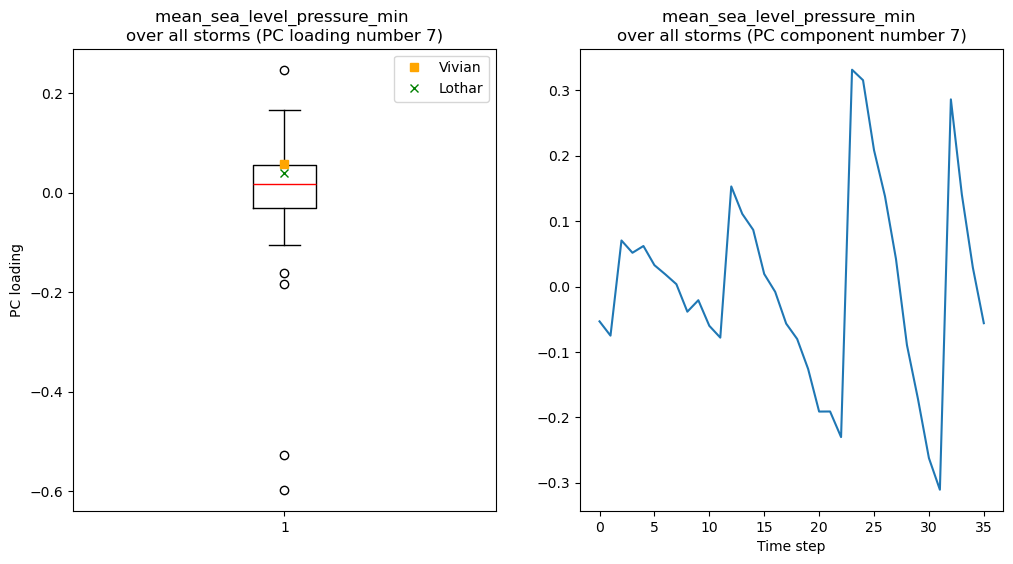

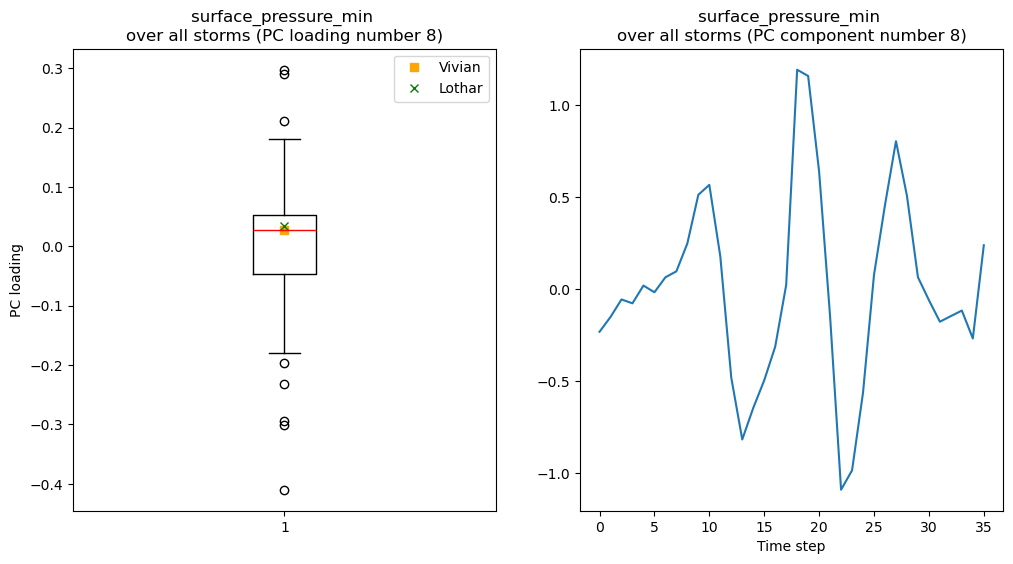

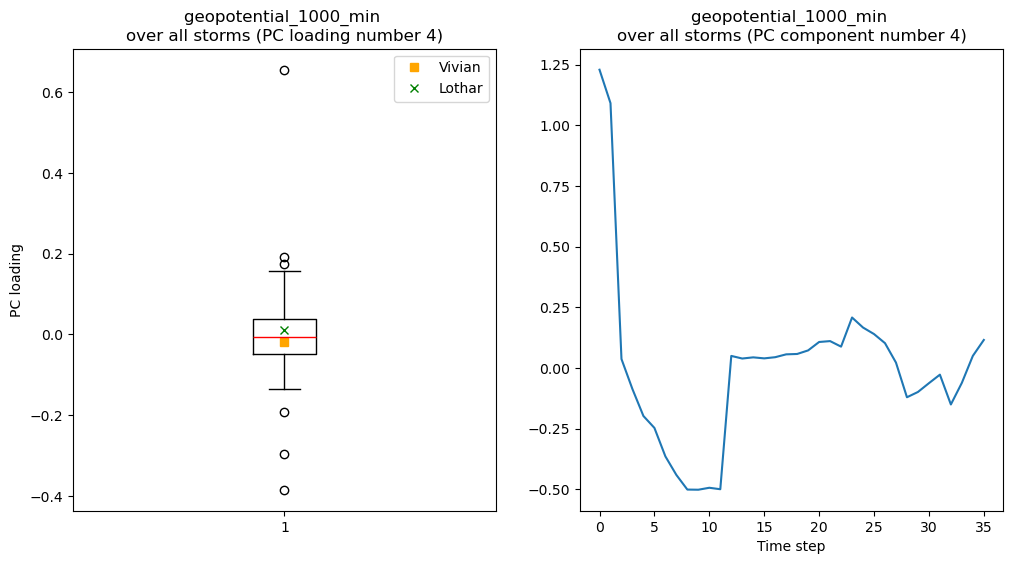

In [9]:
selected_output = loadings_selected_max
scores_selected = scores_max
loadings_selected = loadings_max

for var in selected_output['var_name']:
    if var.startswith('10m_'):
        continue
    temp_scores = scores_selected[var]
    temp_loadings = loadings_selected[var]

    pc_n = int(selected_output[selected_output['var_name'] == var]['PC'].values[0].split('PC')[1])-1
    var_pc = temp_loadings.iloc[pc_n-1,:]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Two subplots horizontally
    #axes[0].scatter(temp_loadings.columns, var_pc)
    #axes[0].xaxis.set_tick_params(rotation=45)
    axes[0].set_title(f'{var} \nover all storms (PC loading number {pc_n})')
    #axes[0].set_xlabel('Storm number')
    axes[0].boxplot(var_pc, medianprops = dict(color='red'))
    axes[0].set_ylabel('PC loading')
    axes[0].plot(1, var_pc.iloc[6], color='orange', marker='s', label='Vivian', linestyle='none')
    axes[0].plot(1, var_pc.iloc[38], color='green', marker='x', label='Lothar', linestyle='none')
    axes[0].legend()

    var_score_pc = temp_scores[f'PCA_{pc_n}']
    axes[1].plot(var_score_pc)
    axes[1].set_title(f'{var} \nover all storms (PC component number {pc_n})')
    axes[1].set_xlabel('Time step')
    plt.show()